In [1]:
# Import Tensorflow 2.0

import tensorflow as tf 

import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm
import pandas as pd 


# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU


loading training images

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)


(42000, 785)


In [3]:
trainingSize = 40000

In [4]:
train_labels = data['label'][:trainingSize]
Evaluation_labels = data['label'][trainingSize:]
train_labels = train_labels.astype('float64')
Evaluation_labels = Evaluation_labels.astype('float64')
print(train_labels.shape)
print(Evaluation_labels.shape)

(40000,)
(2000,)


In [5]:
images = data.to_numpy()[:,1:]
images = images.astype('float64')
train_img = images[:trainingSize,:]
Evaluation_images = images[trainingSize:,:]

print(train_img.shape)
print(train_img.dtype)
print(Evaluation_images.shape)
print(Evaluation_images.dtype)



(40000, 784)
float64
(2000, 784)
float64


In [6]:
Evaluation_images = Evaluation_images.reshape((Evaluation_images.shape[0],28,28,1))
print(Evaluation_images.shape)
print(Evaluation_images[[0]].shape)



(2000, 28, 28, 1)
(1, 28, 28, 1)


In [7]:

train_images = train_img.reshape((train_img.shape[0],28,28,1))
print(train_images.shape)
print(train_images[[0]].shape)

(40000, 28, 28, 1)
(1, 28, 28, 1)


In [8]:
dt = pd.read_csv('test.csv')
dt

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
dt = pd.read_csv('test.csv')
print(dt.shape)
test_img = dt.to_numpy()
test_img = test_img.astype('float64')
print(test_img.shape)
print(test_img.dtype)


(28000, 784)
(28000, 784)
float64


In [10]:
test_images = test_img.reshape((test_img.shape[0],28,28,1))
test_images.shape
test_images[[0]].shape

(1, 28, 28, 1)

In [11]:
def build_cnn_model():
    cnn_model = tf.keras.Sequential([

        # TODO: Define the first convolutional layer
        tf.keras.layers.Conv2D(filters=24, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''') 

        # TODO: Define the first max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        # TODO: Define the second convolutional layer
        tf.keras.layers.Conv2D(filters=36, kernel_size=(3,3), activation=tf.nn.relu),
        # tf.keras.layers.Conv2D('''TODO''')

        # TODO: Define the second max pooling layer
        tf.keras.layers.MaxPool2D(pool_size=(2,2)),
        # tf.keras.layers.MaxPool2D('''TODO''')

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),

        # TODO: Define the last Dense layer to output the classification 
        # probabilities. Pay attention to the activation needed a probability
        # output
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
        # [TODO Dense layer to output classification probabilities]
    ])
    
    return cnn_model
cnn_model = build_cnn_model()
# Initialize the model by passing some data through
cnn_model.predict(train_images[[0]])
# Print the summary of the layers in the model.
print(cnn_model.summary())


1/1 [==============================] - 0s 256ms/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 24)        240       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 36)        7812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 900)               0         
                                                                 
 de

In [19]:
'''TODO: Define the compile operation with your optimizer and learning rate of choice'''
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.5e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# cnn_model.compile(optimizer='''TODO''', loss='''TODO''', metrics=['accuracy']) # TODO

In [20]:
BATCH_SIZE = 128
EPOCHS = 5

In [21]:
'''TODO: Use model.fit to train the CNN model, with the same batch_size and number of epochs previously used.'''
cnn_model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
# cnn_model.fit('''TODO''')

Epoch 1/5
313/313 [==============================] - 14s 43ms/step - loss: 0.0485 - accuracy: 0.9854
Epoch 2/5
313/313 [==============================] - 12s 40ms/step - loss: 0.0259 - accuracy: 0.9922
Epoch 3/5
313/313 [==============================] - 14s 43ms/step - loss: 0.0181 - accuracy: 0.9946
Epoch 4/5
313/313 [==============================] - 14s 45ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 5/5
313/313 [==============================] - 14s 46ms/step - loss: 0.0091 - accuracy: 0.9978


In [22]:
'''TODO: Use the evaluate method to test the model!'''
test_loss, test_acc = cnn_model.evaluate(Evaluation_images, Evaluation_labels)
# test_loss, test_acc = # TODO

print('Test accuracy:', test_acc)

63/63 [==============================] - 1s 11ms/step - loss: 0.0846 - accuracy: 0.9835
Test accuracy: 0.9835000038146973


In [24]:
# testing or pedicting 
test_data = pd.read_csv('test.csv')
test_data.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test_img = test_data.to_numpy()
test_img = test_img.astype('float64')
test_images = test_img.reshape((test_img.shape[0],28,28,1))
print(test_images.shape, test_images.dtype)

(28000, 28, 28, 1) float64


In [31]:
predictions = cnn_model.predict(test_images)

875/875 [==============================] - 7s 7ms/step


In [32]:
predictions

array([[5.9832650e-24, 1.4706710e-16, 1.0000000e+00, ..., 1.0805134e-19,
        6.2242884e-18, 4.3077347e-28],
       [1.0000000e+00, 5.1388466e-24, 2.1656539e-11, ..., 3.1611280e-14,
        2.5503848e-09, 7.8684803e-10],
       [2.9197188e-18, 2.2315602e-16, 1.3549410e-08, ..., 8.6901140e-17,
        2.4386356e-06, 9.9999762e-01],
       ...,
       [1.6856704e-30, 7.8315618e-24, 1.6883317e-26, ..., 1.6839292e-22,
        1.2895480e-22, 1.4069207e-16],
       [8.1234759e-13, 6.1148129e-16, 8.3641677e-11, ..., 2.8435865e-09,
        1.0605601e-09, 1.0000000e+00],
       [2.3973689e-20, 8.7407447e-15, 1.0000000e+00, ..., 2.0763116e-18,
        9.1362473e-15, 1.0703368e-24]], dtype=float32)

In [33]:
'''TODO: identify the digit with the highest confidence prediction for the first
    image in the test dataset. '''
predicted = np.argmax(predictions[0]) 
# prediction = # TODO

print(prediction)

2


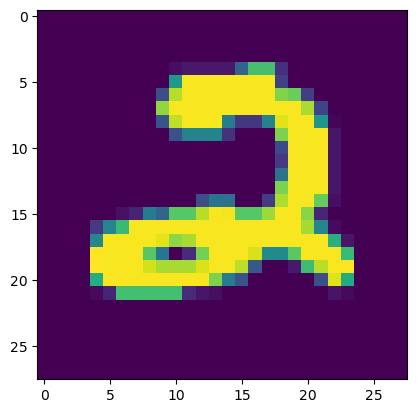

In [35]:
plt.imshow(test_images[0])

In [57]:
predicted_answer = []
for i in range(predictions.shape[0]):
    predicted = np.argmax(predictions[i])
    predicted_answer.append(predicted)
    print(predicted)

2
0
9
4
3
7
0
3
0
3
5
7
4
0
4
3
3
1
9
0
9
1
1
5
7
4
2
7
4
7
7
5
4
2
6
2
5
5
1
6
7
7
4
9
8
7
8
2
6
7
6
8
8
3
8
2
1
2
2
0
4
1
7
0
0
0
1
9
0
1
6
5
8
8
2
8
9
9
2
3
5
4
1
0
9
2
4
3
6
7
2
0
6
6
1
4
3
9
7
4
0
9
2
0
7
3
0
5
0
9
0
0
4
7
1
7
1
1
3
3
3
7
2
8
6
3
8
7
7
4
3
5
6
0
0
0
3
1
3
6
4
3
4
5
5
8
7
7
2
8
4
3
5
6
5
3
7
5
7
8
3
0
4
5
1
2
7
6
3
0
2
7
8
6
1
3
7
4
1
2
4
8
5
2
4
9
2
1
6
0
6
1
4
9
6
0
9
7
6
9
1
9
0
9
9
0
8
4
6
2
0
9
3
6
3
2
1
6
3
4
2
3
1
2
2
0
4
6
1
0
0
4
9
1
7
3
2
3
8
6
8
6
2
8
5
5
9
8
3
5
9
7
1
3
8
4
5
1
4
5
6
3
3
5
7
0
6
8
3
1
6
0
6
3
9
5
1
5
8
4
0
9
2
0
5
3
7
1
9
9
5
7
7
9
9
6
3
0
3
3
6
9
8
2
6
3
7
1
4
5
8
5
9
0
0
3
8
4
1
8
4
1
1
9
8
4
5
1
5
3
6
3
1
3
0
9
0
0
6
0
6
3
1
8
6
0
6
5
2
2
6
7
7
2
5
8
3
9
2
7
8
6
3
8
4
2
3
8
1
6
4
8
7
9
7
6
9
5
3
7
6
5
5
4
2
6
2
1
3
7
1
7
9
9
6
1
1
1
7
3
9
7
6
1
1
1
9
3
8
5
5
0
4
1
2
3
1
1
3
5
9
6
6
5
3
1
4
7
4
7
4
8
5
2
6
1
3
9
5
0
8
4
7
4
4
4
1
5
3
9
5
7
6
9
5
9
2
3
5
6
6
7
5
0
5
1
7
4
4
1
1
4
9
5
6
0
1
3
1
0
4
8
1
2
7
9
4
8
3
7
7
4
2
4
8
7
6
3
2
0


In [90]:
predicted_answer = np.array(predicted_answer)


In [92]:
predicted_digits = pd.DataFrame(predicted_answer, columns = ['label'])

In [93]:
predicted_digits.head()

,label
0,2
1,0
2,9
3,4
4,3


(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

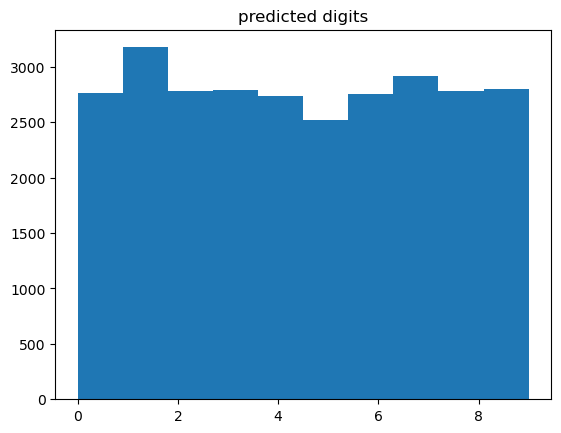

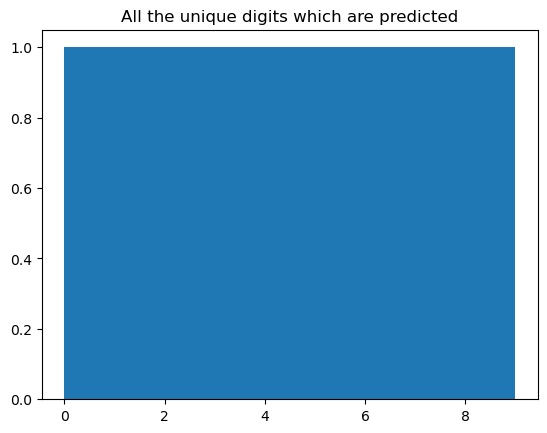

In [94]:
plt.figure(1)
plt.hist(predicted_answer)
plt.title("predicted digits")
plt.figure(2)
plt.title("All the unique digits which are predicted")
plt.hist(set(predicted_answer))

In [95]:
predicted_digits.to_csv("submission.csv")